# Import Libraries

#### Code Structure:

model.py : Contains network structure

misclassified_images.py : Contains utility function to plot misclassified images from inference on test loader.

train_test_loader.py : Contains code for train test dataloader.

trainer.py : Contains training and testing code of the network

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from __future__ import print_function
import numpy as np
import torch
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR,OneCycleLR

from torchsummary import summary

%matplotlib inline
import matplotlib.pyplot as plt


import sys
import os

util_files = '/content/drive/MyDrive/TSAI/EVA_6/Assignment_6'
sys.path.append(os.path.abspath(util_files))

import files.model
from files.model import Net
from files.train_test_data_loader import train_test_data_loader
from files.trainer import train, test
from files.misclassified_images import plot_incorrect_preds

In [3]:
!pip install torchsummary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

# Train test dataloader

In [4]:
batch_size=128

train_loader, test_loader = train_test_data_loader(batch_size)

CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [8]:
torch.manual_seed(1)
if use_cuda:
    torch.cuda.manual_seed(1)
EPOCHS = 25

# Train test loop

In [9]:
training_values = {
    "group_norm" : {
        "training_loss" : [],
        "testing_loss" : [],
        "training_acc" : [],
        "testing_acc" : []
    },
    "batch_norm" : {
        "training_loss" : [],
        "testing_loss" : [],
        "training_acc" : [],
        "testing_acc" : []
    },
    "layer_norm" : {
        "training_loss" : [],
        "testing_loss" : [],
        "training_acc" : [],
        "testing_acc" : []
    }
}

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
              ReLU-2           [-1, 10, 28, 28]               0
         GroupNorm-3           [-1, 10, 28, 28]              20
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 16, 28, 28]           1,440
              ReLU-6           [-1, 16, 28, 28]               0
         GroupNorm-7           [-1, 16, 28, 28]              32
           Dropout-8           [-1, 16, 28, 28]               0
            Conv2d-9           [-1, 10, 28, 28]             160
        MaxPool2d-10           [-1, 10, 14, 14]               0
           Conv2d-11           [-1, 16, 14, 14]           1,440
             ReLU-12           [-1, 16, 14, 14]               0
        GroupNorm-13           [-1, 16, 14, 14]              32
          Dropout-14           [-1, 16,

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


L1 =  tensor(902.2820, device='cuda:0', grad_fn=<AddBackward0>)
Train set: Accuracy=86.2
Test set: Average loss: 0.0627, Accuracy: 9815/10000 (98.2%)

EPOCH: 2 LR =  [0.05]
L1 =  tensor(932.1868, device='cuda:0', grad_fn=<AddBackward0>)
Train set: Accuracy=96.3
Test set: Average loss: 0.0517, Accuracy: 9842/10000 (98.4%)

EPOCH: 3 LR =  [0.05]
L1 =  tensor(941.3483, device='cuda:0', grad_fn=<AddBackward0>)
Train set: Accuracy=97.1
Test set: Average loss: 0.0567, Accuracy: 9828/10000 (98.3%)

EPOCH: 4 LR =  [0.05]
L1 =  tensor(938.4154, device='cuda:0', grad_fn=<AddBackward0>)
Train set: Accuracy=97.4
Test set: Average loss: 0.0359, Accuracy: 9886/10000 (98.9%)

EPOCH: 5 LR =  [0.0005000000000000001]
L1 =  tensor(921.3036, device='cuda:0', grad_fn=<AddBackward0>)
Train set: Accuracy=98.2
Test set: Average loss: 0.0292, Accuracy: 9909/10000 (99.1%)

EPOCH: 6 LR =  [0.005000000000000001]
L1 =  tensor(905.4277, device='cuda:0', grad_fn=<AddBackward0>)
Train set: Accuracy=98.5
Test set: Ave

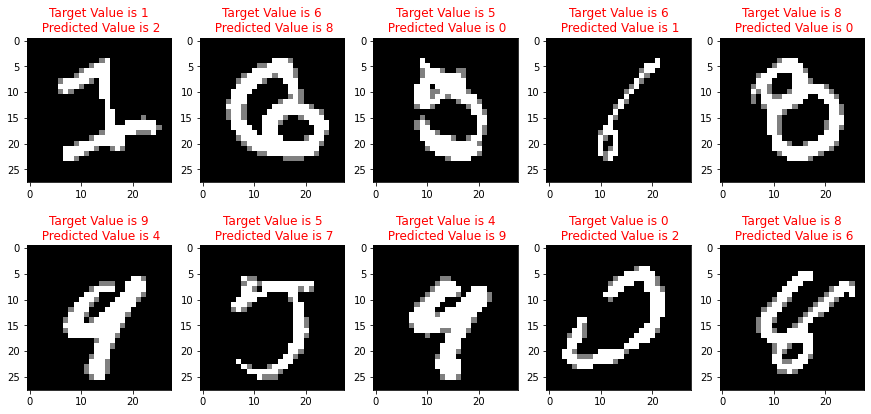

In [10]:
model_group = Net("group").to(device)
print(summary(model_group, input_size=(1, 28, 28)))
optimizer_group = optim.SGD(model_group.parameters(), lr=0.05, momentum=0.9)
scheduler_group = StepLR(optimizer_group, step_size=4, gamma=0.1)

for epoch in range(1, EPOCHS +1):
    print("EPOCH:", epoch, "LR = ", scheduler_group.get_lr())
    training_loss_group, training_acc_group = train(model_group, device, train_loader, optimizer_group, epoch, l1_loss= True)
    testing_loss_group, testing_acc_group = test(model_group, device, test_loader)
    scheduler_group.step()
    training_values['group_norm']["training_loss"].extend(training_loss_group)
    training_values['group_norm']["testing_loss"].extend(testing_loss_group)
    
    training_values['group_norm']["training_acc"].append(training_acc_group)
    training_values['group_norm']["testing_acc"].append(testing_acc_group)

plot_incorrect_preds(model_group, test_loader, device)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
              ReLU-2           [-1, 10, 28, 28]               0
         GroupNorm-3           [-1, 10, 28, 28]              20
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 16, 28, 28]           1,440
              ReLU-6           [-1, 16, 28, 28]               0
         GroupNorm-7           [-1, 16, 28, 28]              32
           Dropout-8           [-1, 16, 28, 28]               0
            Conv2d-9           [-1, 10, 28, 28]             160
        MaxPool2d-10           [-1, 10, 14, 14]               0
           Conv2d-11           [-1, 16, 14, 14]           1,440
             ReLU-12           [-1, 16, 14, 14]               0
        GroupNorm-13           [-1, 16, 14, 14]              32
          Dropout-14           [-1, 16,

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train set: Accuracy=88.5
Test set: Average loss: 0.0857, Accuracy: 9756/10000 (97.6%)

EPOCH: 2 LR =  [0.05]
Train set: Accuracy=96.8
Test set: Average loss: 0.0673, Accuracy: 9798/10000 (98.0%)

EPOCH: 3 LR =  [0.05]
Train set: Accuracy=97.3
Test set: Average loss: 0.0940, Accuracy: 9723/10000 (97.2%)

EPOCH: 4 LR =  [0.05]
Train set: Accuracy=97.5
Test set: Average loss: 0.0554, Accuracy: 9837/10000 (98.4%)

EPOCH: 5 LR =  [0.0005000000000000001]
Train set: Accuracy=98.4
Test set: Average loss: 0.0341, Accuracy: 9906/10000 (99.1%)

EPOCH: 6 LR =  [0.005000000000000001]
Train set: Accuracy=98.6
Test set: Average loss: 0.0322, Accuracy: 9908/10000 (99.1%)

EPOCH: 7 LR =  [0.005000000000000001]
Train set: Accuracy=98.7
Test set: Average loss: 0.0357, Accuracy: 9887/10000 (98.9%)

EPOCH: 8 LR =  [0.005000000000000001]
Train set: Accuracy=98.7
Test set: Average loss: 0.0326, Accuracy: 9903/10000 (99.0%)

EPOCH: 9 LR =  [5.0000000000000016e-05]
Train set: Accuracy=98.8
Test set: Average lo

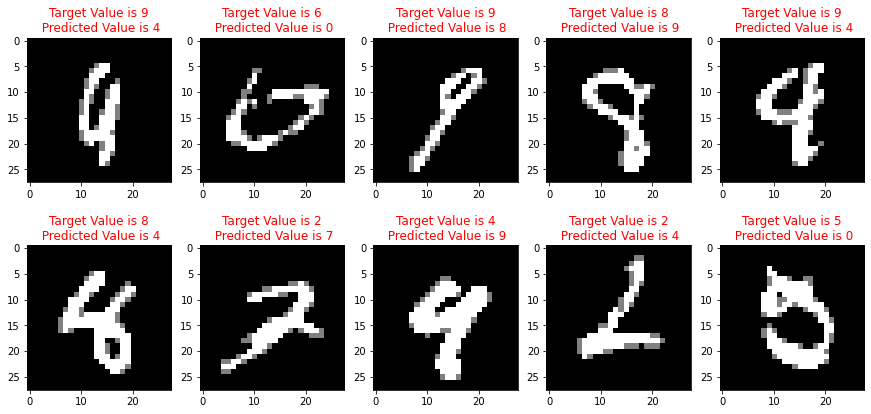

In [11]:
model_layer = Net("layer").to(device)
print(summary(model_layer, input_size=(1, 28, 28)))
optimizer_layer = optim.SGD(model_layer.parameters(), lr=0.05, momentum=0.9, weight_decay=0.001)
scheduler_layer = StepLR(optimizer_layer, step_size=4, gamma=0.1)

for epoch in range(1, EPOCHS +1):
    print("EPOCH:", epoch, "LR = ", scheduler_layer.get_lr())
    training_loss_layer, training_acc_layer = train(model_layer, device, train_loader, optimizer_layer, epoch, l1_loss= False)
    testing_loss_layer, testing_acc_layer = test(model_layer, device, test_loader)
    scheduler_layer.step()
    training_values['layer_norm']["training_loss"].extend(training_loss_layer)
    training_values['layer_norm']["testing_loss"].extend(testing_loss_layer)
    
    training_values['layer_norm']["training_acc"].append(training_acc_layer)
    training_values['layer_norm']["testing_acc"].append(testing_acc_layer)


plot_incorrect_preds(model_layer, test_loader, device)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
              ReLU-2           [-1, 10, 28, 28]               0
       BatchNorm2d-3           [-1, 10, 28, 28]              20
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 16, 28, 28]           1,440
              ReLU-6           [-1, 16, 28, 28]               0
       BatchNorm2d-7           [-1, 16, 28, 28]              32
           Dropout-8           [-1, 16, 28, 28]               0
            Conv2d-9           [-1, 10, 28, 28]             160
        MaxPool2d-10           [-1, 10, 14, 14]               0
           Conv2d-11           [-1, 16, 14, 14]           1,440
             ReLU-12           [-1, 16, 14, 14]               0
      BatchNorm2d-13           [-1, 16, 14, 14]              32
          Dropout-14           [-1, 16,

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


L1 =  tensor(720.1602, device='cuda:0', grad_fn=<AddBackward0>)
Train set: Accuracy=91.7
Test set: Average loss: 0.1774, Accuracy: 9428/10000 (94.3%)

EPOCH: 2 LR =  [0.05]
L1 =  tensor(665.5874, device='cuda:0', grad_fn=<AddBackward0>)
Train set: Accuracy=97.1
Test set: Average loss: 0.1221, Accuracy: 9643/10000 (96.4%)

EPOCH: 3 LR =  [0.05]
L1 =  tensor(647.0197, device='cuda:0', grad_fn=<AddBackward0>)
Train set: Accuracy=97.4
Test set: Average loss: 0.0988, Accuracy: 9679/10000 (96.8%)

EPOCH: 4 LR =  [0.05]
L1 =  tensor(611.8023, device='cuda:0', grad_fn=<AddBackward0>)
Train set: Accuracy=97.6
Test set: Average loss: 0.0993, Accuracy: 9722/10000 (97.2%)

EPOCH: 5 LR =  [0.0005000000000000001]
L1 =  tensor(581.0978, device='cuda:0', grad_fn=<AddBackward0>)
Train set: Accuracy=98.5
Test set: Average loss: 0.0359, Accuracy: 9894/10000 (98.9%)

EPOCH: 6 LR =  [0.005000000000000001]
L1 =  tensor(553.6174, device='cuda:0', grad_fn=<AddBackward0>)
Train set: Accuracy=98.6
Test set: Ave

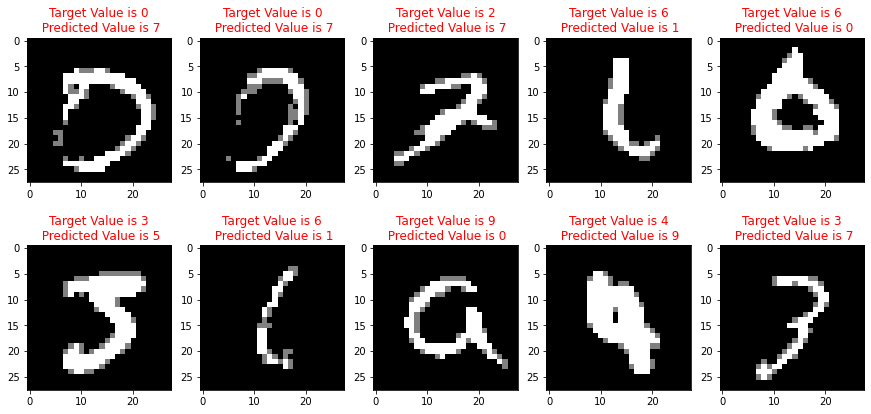

In [12]:
model_batch = Net("batch").to(device)
print(summary(model_batch, input_size=(1, 28, 28)))
optimizer_batch = optim.SGD(model_batch.parameters(), lr=0.05, momentum=0.9, weight_decay=0.001)
scheduler_batch = StepLR(optimizer_batch, step_size=4, gamma=0.1)

for epoch in range(1, EPOCHS +1):
    print("EPOCH:", epoch, "LR = ", scheduler_batch.get_lr())
    training_loss_batch, training_acc_batch = train(model_batch, device, train_loader, optimizer_batch, epoch, l1_loss= True)
    testing_loss_batch, testing_acc_batch = test(model_batch, device, test_loader)
    scheduler_batch.step()
    
    training_values['batch_norm']["training_loss"].extend(training_loss_batch)
    training_values['batch_norm']["testing_loss"].extend(testing_loss_batch)
    
    training_values['batch_norm']["training_acc"].append(training_acc_batch)
    training_values['batch_norm']["testing_acc"].append(testing_acc_batch)

plot_incorrect_preds(model_batch, test_loader,device)


# Plotting Function

In [13]:
plt.rcParams['figure.figsize'] = [15, 6]

def plotting_curves(model1, model2, model3, legend, title):
  plt.plot(np.array(model1))
  plt.plot(np.array(model2), 'r')
  plt.plot(np.array(model3), 'g')
  plt.legend(legend)
  plt.title(title)

### Plotting Training Loss per Epoch

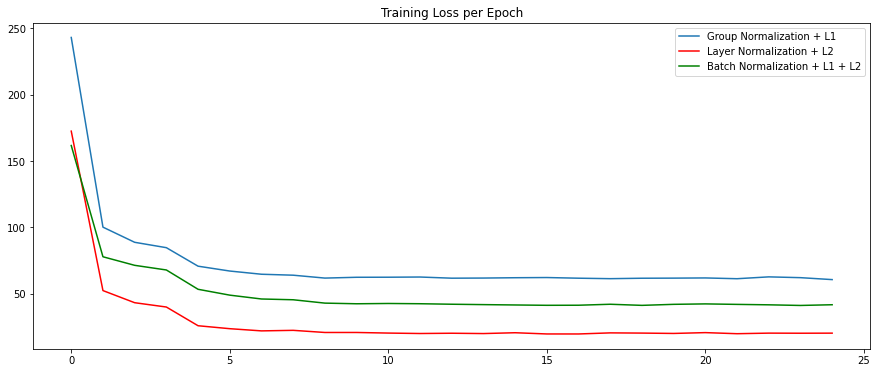

In [14]:


plotting_curves(training_values['group_norm']["training_loss"], training_values['layer_norm']["training_loss"], training_values['batch_norm']["training_loss"], ['Group Normalization + L1', 'Layer Normalization + L2', 'Batch Normalization + L1 + L2'], 'Training Loss per Epoch')

### Plotting Test Loss per Epoch

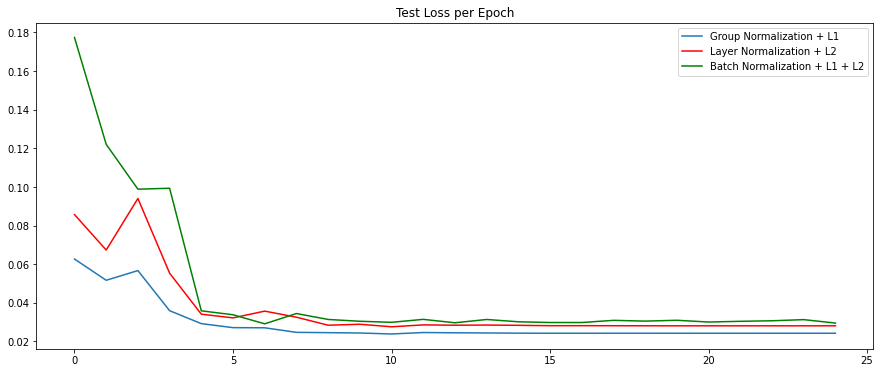

In [15]:
plotting_curves(training_values['group_norm']["testing_loss"], training_values['layer_norm']["testing_loss"], training_values['batch_norm']["testing_loss"], ['Group Normalization + L1', 'Layer Normalization + L2', 'Batch Normalization + L1 + L2'], 'Test Loss per Epoch')

### Plotting Training Accuracy per Epoch

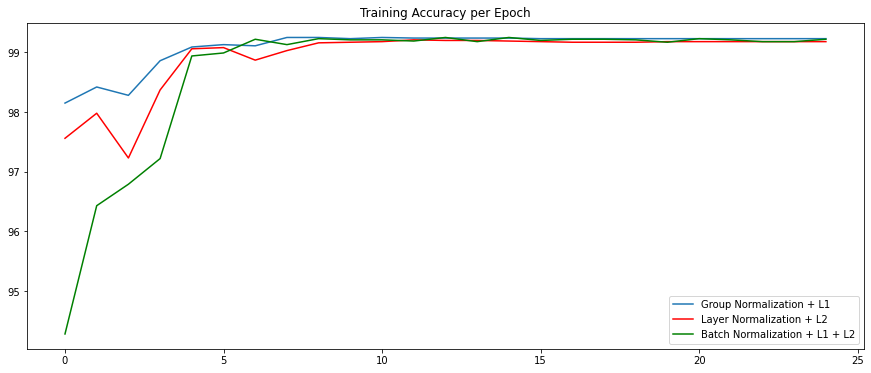

In [17]:
plotting_curves(training_values['group_norm']["testing_acc"], training_values['layer_norm']["testing_acc"], training_values['batch_norm']["testing_acc"], ['Group Normalization + L1', 'Layer Normalization + L2', 'Batch Normalization + L1 + L2'], 'Training Accuracy per Epoch')

### Plotting Test Accuracy per Epoch

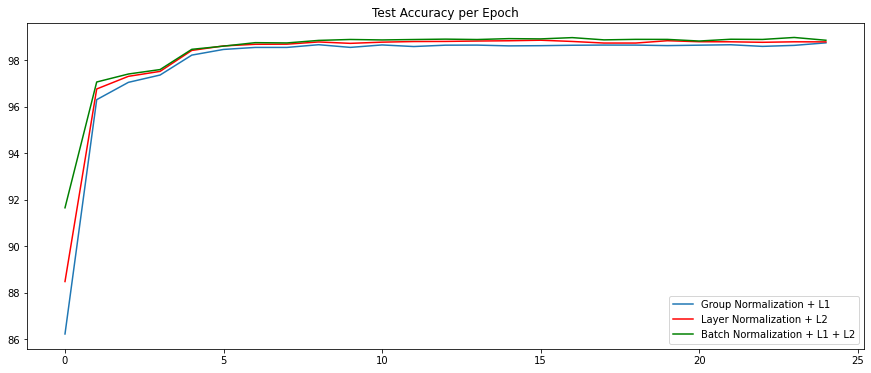

In [16]:
plotting_curves(training_values['group_norm']["training_acc"], training_values['layer_norm']["training_acc"], training_values['batch_norm']["training_acc"], ['Group Normalization + L1', 'Layer Normalization + L2', 'Batch Normalization + L1 + L2'], 'Test Accuracy per Epoch')